<a href="https://colab.research.google.com/github/yelagampragathi/NLP_16/blob/main/CRAZYCATS_ASS_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install necessary libraries if not already installed
# !pip install gensim scikit-learn spacy matplotlib

# Load necessary libraries
from gensim.models import KeyedVectors
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import spacy
import gensim.downloader as api
import pandas as pd
import numpy as np

In [ ]:

# Load the SpaCy model for dependency parsing
print("\nLoading SpaCy model for dependency parsing...")
nlp = spacy.load('en_core_web_sm')
print("SpaCy model loaded successfully!")


Loading SpaCy model for dependency parsing...
SpaCy model loaded successfully!


In [ ]:
# Load dataset (replace this with your dataset file)
dataset_path = '/content/Indian language community chatbot.csv'  # Replace with your dataset path
df = pd.read_csv(dataset_path)

In [ ]:
data = {
    "ID": [1, 2, 3],
    "English Text": [
        "I love mangoes.",
        "No, I am active at night.",
        "My dream is to become a pilot."
    ]
}

In [ ]:
# Convert dictionary to DataFrame
df = pd.DataFrame(data)

In [ ]:
# Initialize lists for word embeddings and corresponding words
filtered_words = []
embeddings = []

In [ ]:
# Dummy implementation of word embeddings - replace with your actual embedding method
def get_word_embedding(word):
    # Dummy vector based on word length for illustration purposes
    return np.array([len(word), ord(word[0]) % 128])

In [ ]:
# Perform dependency parsing and collect embeddings
for index, row in df.iterrows():
    text = row["English Text"]
    doc = nlp(text)

    print(f"\nDependency Parsing for Text {index + 1}: '{text}'")
    for token in doc:
        print(f'{token.text:10} {token.dep_:10} {token.head.text:10} {token.head.pos_:10} {str([child for child in token.children]):30}')

        # Collect words and their embeddings
        filtered_words.append(token.text)
        embeddings.append(get_word_embedding(token.text))


Dependency Parsing for Text 1: 'I love mangoes.'
I          nsubj      love       VERB       []                            
love       ROOT       love       VERB       [I, mangoes, .]               
mangoes    dobj       love       VERB       []                            
.          punct      love       VERB       []                            

Dependency Parsing for Text 2: 'No, I am active at night.'
No         intj       am         AUX        []                            
,          punct      am         AUX        []                            
I          nsubj      am         AUX        []                            
am         ROOT       am         AUX        [No, ,, I, active, at, .]     
active     acomp      am         AUX        []                            
at         prep       am         AUX        [night]                       
night      pobj       at         ADP        []                            
.          punct      am         AUX        []                   

In [ ]:
# Convert embeddings to numpy array
embeddings = np.array(embeddings)

In [ ]:
# Check the number of samples in embeddings
n_samples = embeddings.shape[0]

In [ ]:
# Set n_components dynamically based on the number of samples
n_components = min(2, n_samples)

In [ ]:
# Perform PCA with the appropriate number of components
pca = PCA(n_components=n_components)
result = pca.fit_transform(embeddings)

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

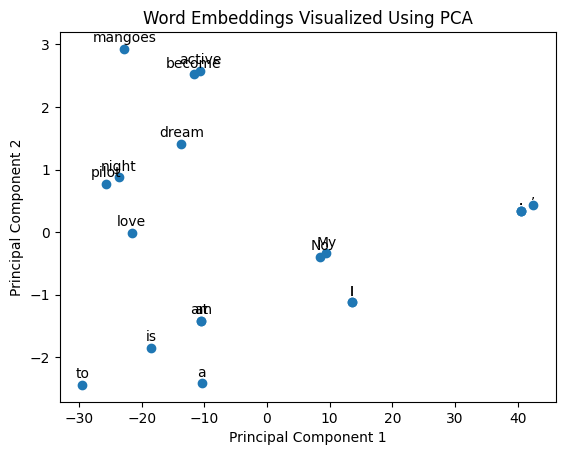

In [ ]:
# If n_components is 2, we can plot a 2D scatter plot
if n_components == 2:
    plt.scatter(result[:, 0], result[:, 1])

    # Annotate each point with the corresponding word
    for i, word in enumerate(filtered_words):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]), textcoords="offset points", xytext=(0, 5), ha='center')

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    # If n_components is 1, create a simple line plot
elif n_components == 1:
    plt.scatter(result[:, 0], [0] * len(result))  # Plot along a single axis

    # Annotate each point with the corresponding word
    for i, word in enumerate(filtered_words):
        plt.annotate(word, xy=(result[i, 0], 0), textcoords="offset points", xytext=(0, 5), ha='center')

    plt.xlabel('Principal Component 1')

plt.title('Word Embeddings Visualized Using PCA')
plt.show()
